In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os

In [3]:
orig_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train/32/32'
print('total images:', len(os.listdir(orig_dir)))
temp = os.listdir(orig_dir)

total images: 4002


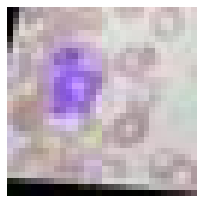

In [50]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

img_path = os.path.join(orig_dir, temp[251]) 


sp = plt.subplot(nrows, ncols, 1)
sp.axis('Off') # Don't show axes (or gridlines)

img = Image.open(img_path)
pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
pix = pix.reshape(32,32,3)
pix = pix.astype('float32')
pix /= 255.
plt.imshow(pix)
plt.show()

In [0]:
def compute_mag_phase(toBeTransfromed):
    dft = np.fft.fft2(toBeTransfromed)
    dft_shift = np.fft.fftshift(dft)
    mag = np.abs(dft_shift)
    ang = np.angle(dft_shift)
    return mag, ang

def reconstruct(mag,ang):
    combined = np.multiply(mag, np.exp(1j*ang))
    #combinedReal = np.real(combined)
    #combinedImag = np.imag(combined)
    fftx = np.fft.ifftshift(combined)
    ffty = np.fft.ifft2(fftx)
    imgCombined = np.abs(ffty)
    return imgCombined

In [0]:
import random
np.random.seed(100)
noise_mag = np.random.uniform(size = (32,32,3),low = 0.0, high = 7.0)

const_mag = np.full((32, 32, 3), 1.2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.3333992925302436


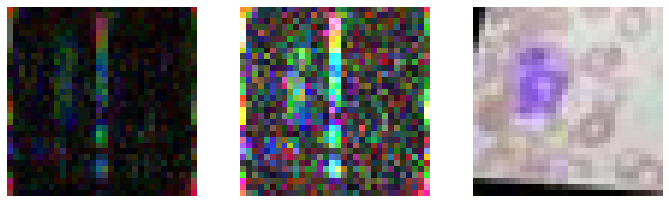

In [51]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
sp = plt.subplot(nrows, ncols, 1)
sp.axis('Off') # Don't show axes (or gridlines)



mag, ang =  compute_mag_phase(pix)
pix2 = reconstruct(const_mag,ang)
pix3 = reconstruct(noise_mag,ang)
print(np.mean(mag))
plt.imshow(pix2)

sp = plt.subplot(nrows, ncols, 2)
sp.axis('Off') # Don't show axes (or gridlines)
plt.imshow(pix3)

sp = plt.subplot(nrows, ncols, 3)
sp.axis('Off') # Don't show axes (or gridlines)
plt.imshow(pix)

plt.show()

Constant magnitude appears better